In [1]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import pedigree as pd 

In [2]:
import matplotlib.pyplot as plt
mycmap=plt.get_cmap('Pastel1')

def nodevalue(n):
    cols={"X":0.5,
              "S":0.9,
              "m":0.7,
              "f":0.75}
    return cols[n[0]]

# Pedigree's loading

In [3]:
ped = pd.Pedigree()
ped.load('../data/ped/famRh.ped')

# Bayesien Networks Generation's

In [10]:
def createInd(bn,p,f):
    bn.add(gum.LabelizedVariable(f"matX{p.pID}",f"mother of {p.pID}",["0","1"]))
    bn.add(gum.LabelizedVariable(f"fatX{p.pID}",f"father of {p.pID}",["0","1"]))
    bn.add(gum.LabelizedVariable(f"X{p.pID}",f"{p.pID}",["00","01","10","11"]))
    bn.addArc(f"fatX{p.pID}",f"X{p.pID}")
    bn.addArc(f"matX{p.pID}",f"X{p.pID}")
    #gnb.showPotential(bn.cpt(f"X{p.pID}").fillWith([1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1]))
    bn.cpt(f"X{p.pID}").fillWith([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1])
    #bn.cpt(f"X{p.pID}").fillWith([(1-f)**2, 0, 0, 0, 0, f*(1-f), 0, 0, 0, 0, f*(1-f), 0, 0, 0, 0, (1-f)**2])

In [11]:
def joindreParent(bn,p,parent):
    #parent = fat ou mat
    if parent == 'fat':
        parentID = p.fatID
    else:
        parentID = p.matID
    
    #Creating Selector 
    bn.add(gum.LabelizedVariable(f"S{parent}{p.pID}",f"Selector of {parent}ID",["mat","fat"]))
    bn.cpt(f"S{parent}{p.pID}").fillWith([0.5,0.5])
    
    bn.addArc(f"fatX{parentID}",f"{parent}X{p.pID}")
    bn.addArc(f"matX{parentID}",f"{parent}X{p.pID}")         
    #bn.addArc(f"X{parentID}",f"{parent}X{p.pID}") # parent to child
    bn.addArc(f"S{parent}{p.pID}",f"{parent}X{p.pID}") # Selector to fat/mat

    #gnb.showPotential(bn.cpt(f"{parent}X{p.pID}").fillWith([1,0,1,0,0,1,0,1,1,0,0,1,1,0,0,1]))
    bn.cpt(f"{parent}X{p.pID}").fillWith([1,0,1,0,0,1,0,1,1,0,0,1,1,0,0,1])

In [24]:
def bn(ped,f):
    bn = gum.BayesNet()
    for p in ped.get_pedigree().values():
        createInd(bn,p,f)
        
        if p.fatID == '0': # Cas parents inconnu
            bn.cpt(f"fatX{p.pID}").fillWith([1-f,f])
        else: 
            joindreParent(bn,p,'fat')
        
        if p.matID == '0': # Cas parents inconnu
            bn.cpt(f"matX{p.pID}").fillWith([1-f,f])
        else:
            joindreParent(bn,p,'mat')
        
    gnb.showPotential(bn.cpt('matX1'))
    gnb.showPotential(bn.cpt('X1'))
    gnb.showPotential(bn.cpt("fatX5"))
    gnb.showBN(bn,size=100)
    return bn

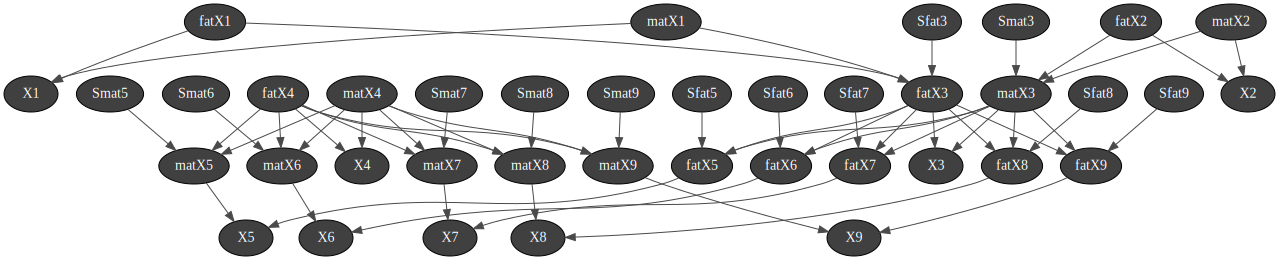

In [13]:
bn = bn(ped,0.05)

In [18]:
ie=gum.LazyPropagation(bn)
ie.posterior('X4')

(gum::Potential<double>@0x56528ede53a0) <X4:00> :: 0.9025 /<X4:01> :: 0.0475 /<X4:10> :: 0.0475 /<X4:11> :: 0.0025

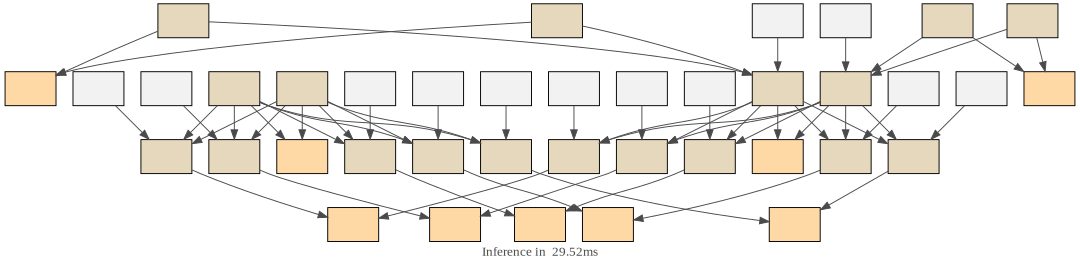

In [16]:
#gnb.showInference(bn,evs={})
gnb.showInference(bn,size=15,nodeColor={n:nodevalue(n) for n in bn.names()},cmap=mycmap)

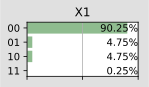

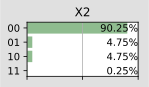

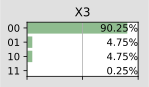

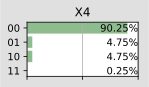

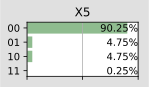

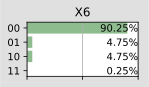

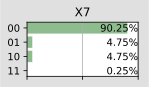

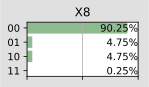

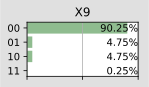

In [17]:
for i in ped.get_pedigree().keys():
    gnb.showProba(ie.posterior(f"X{i}"))

## Inference without evidence

In [19]:
ie=gum.LazyPropagation(bn)
ie.makeInference()
for i in ped.get_pedigree().keys():
    print(ie.posterior(f"X{i}"))

<X1:00> :: 0.9025 /<X1:01> :: 0.0475 /<X1:10> :: 0.0475 /<X1:11> :: 0.0025
<X2:00> :: 0.9025 /<X2:01> :: 0.0475 /<X2:10> :: 0.0475 /<X2:11> :: 0.0025
<X3:00> :: 0.9025 /<X3:01> :: 0.0475 /<X3:10> :: 0.0475 /<X3:11> :: 0.0025
<X4:00> :: 0.9025 /<X4:01> :: 0.0475 /<X4:10> :: 0.0475 /<X4:11> :: 0.0025
<X5:00> :: 0.9025 /<X5:01> :: 0.0475 /<X5:10> :: 0.0475 /<X5:11> :: 0.0025
<X6:00> :: 0.9025 /<X6:01> :: 0.0475 /<X6:10> :: 0.0475 /<X6:11> :: 0.0025
<X7:00> :: 0.9025 /<X7:01> :: 0.0475 /<X7:10> :: 0.0475 /<X7:11> :: 0.0025
<X8:00> :: 0.9025 /<X8:01> :: 0.0475 /<X8:10> :: 0.0475 /<X8:11> :: 0.0025
<X9:00> :: 0.9025 /<X9:01> :: 0.0475 /<X9:10> :: 0.0475 /<X9:11> :: 0.0025


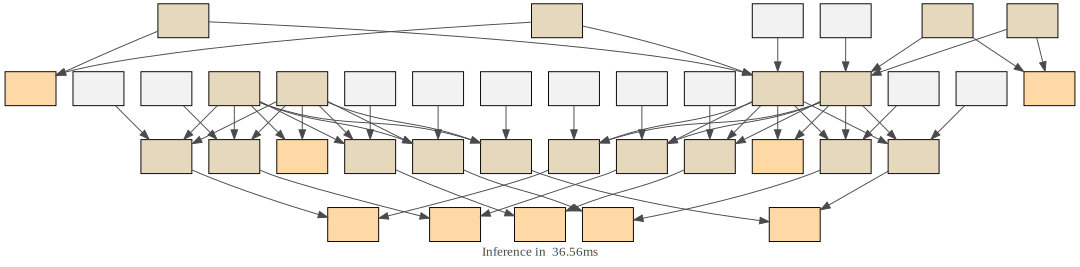

In [21]:
gnb.showInference(bn,size=15,nodeColor={n:nodevalue(n) for n in bn.names()},cmap=mycmap)

## Inference with evidence

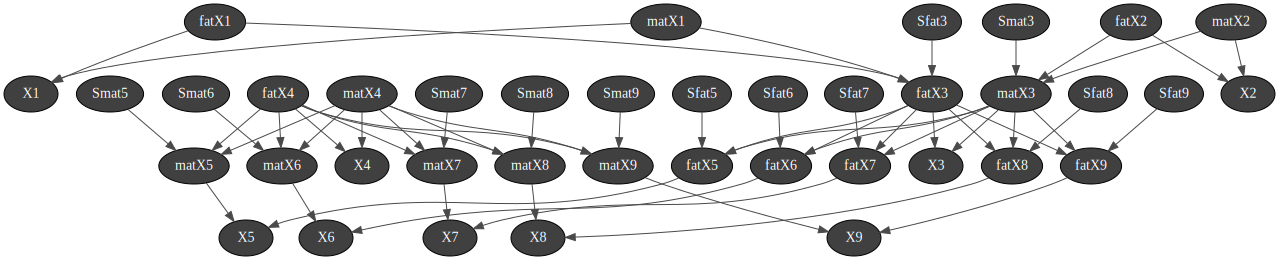

In [25]:
ped = pd.Pedigree()
ped.load('../data/ped/famRh.ped')
bn_with_ev = bn(ped,0.01)

In [26]:
def load_evidence(file):
    tab = dict()
    with open(file,'r') as f:
        for (line,i) in enumerate(f.readlines()):
            ev = i.split()
            tab[line+1] = ev[2:]
    return tab

In [27]:
evidence = load_evidence('../data/famRh.ev')
evidence

{1: ['0', '1', '1', '1'],
 2: ['1', '0', '0', '0'],
 3: ['0', '1', '1', '1'],
 4: ['0', '1', '1', '1'],
 5: ['0', '1', '1', '1'],
 6: ['0', '1', '1', '1'],
 7: ['1', '0', '0', '0'],
 8: ['0', '1', '1', '1'],
 9: ['1', '0', '0', '0']}

In [28]:
for k,v in evidence.items():
    print(k)
    print([int(i) for i in v])
    ie.setEvidence({f'X{k}':[int(i) for i in v]})
ie.makeInference()

1
[0, 1, 1, 1]
2
[1, 0, 0, 0]
3
[0, 1, 1, 1]
4
[0, 1, 1, 1]
5
[0, 1, 1, 1]
6
[0, 1, 1, 1]
7
[1, 0, 0, 0]
8
[0, 1, 1, 1]
9
[1, 0, 0, 0]


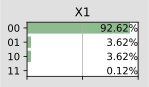

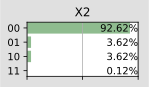

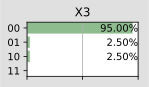

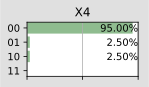

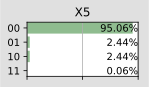

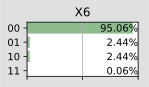

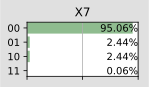

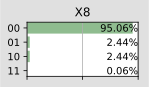

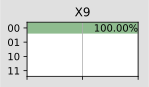

In [29]:
for i in ped.get_pedigree().keys():
    gnb.showProba(ie.posterior(f"X{i}"))

In [ ]:
gnb.showInference(bn_with_ev,size=15,nodeColor={n:nodevalue(n) for n in bn_with_ev.names()},cmap=mycmap)